# Prueba Claro
## Frank Montenegro - frandak2@gmail.com

### importamos las librerias que vamos a usar

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### redireccionamos la ruta del notebook

In [2]:
import os
g = os.getcwd()
g
path = 'D:\\repos\\PRUEBA_GEO'
os.chdir(path)

## Procedemos a leer los archivos shapefile
de antemanos sabemos que el shape MGN es la capa de centros poblados del igac, en este shape tenemos imforacion sobre la forma, tamanio y area de cada centro poblado del pais

In [3]:
Comparendos = gpd.read_file("data/Comparendos_2019_Bogota_D_C-shp/comparendos_corregido.shp")


## Que podemos averiguar con este dataset
### - cual es el total de comparendos mensuales por localidad?
### - cual es la densidad de comparendos anual?

In [4]:
Comparendos['FECHA_HORA'] = pd.to_datetime(Comparendos['FECHA_HORA'])## transformamos la columna fecha
Comparendos['MES'] = pd.Categorical(Comparendos['MES'], categories=[ 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'], ordered=True)
Comparendos.head(5)

,FECHA_HORA,MES,MEDIO_DETE,CLASE_VEHI,TIPO_SERVI,INFRACCION,DES_INFRAC,MUNICIPIO,LATITUD,LONGITUD,CANTIDAD,LOCALIDAD,geometry
0,2019-01-01,ENERO,DEAP,AUTOMÓVIL,Particular,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,BOGOTA,4.750385,-74.088710,1,SUBA,POINT (998757.245 1017049.995)
1,2019-01-01,ENERO,DEAP,AUTOMÓVIL,Particular,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,BOGOTA,4.750385,-74.088710,1,SUBA,POINT (998757.245 1017049.995)
2,2019-01-01,ENERO,DEAP,AUTOMÓVIL,Particular,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,BOGOTA,4.750467,-74.088823,1,SUBA,POINT (998744.709 1017059.063)
3,2019-01-01,ENERO,DEAP,AUTOMÓVIL,Particular,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,BOGOTA,4.750358,-74.088554,1,SUBA,POINT (998774.551 1017047.009)
4,2019-01-01,ENERO,DEAP,AUTOMÓVIL,Público,C02,ESTACIONAR UN VEHÍCULO EN SITIOS PROHIBIDOS.,BOGOTA,4.736974,-74.082732,1,SUBA,POINT (999420.431 1015566.974)


In [5]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [6]:
Comparendos['CLASE_VEHI'] = Comparendos['CLASE_VEHI'].apply(normalize)
Comparendos.CLASE_VEHI = Comparendos.CLASE_VEHI.str.upper()
Comparendos.CLASE_VEHI.value_counts()

AUTOMOVIL                    193754
MOTOCICLETA                   82125
CAMIONETA                     62584
CAMPERO                       18807
BICICLETA O TRICICLO           9863
-                              8700
BICICLETA                      7024
CAMION                         6338
FIELD WAS NOT ENABLED          3779
MICROBUS                       2631
BUS                            2142
MICRO                          1565
BUSETA                          943
VOLQUETA                        767
TRACTOCAMION                    744
MOTOTRICICLO                    284
CICLOMOTO                        81
MOTOCARRO                        73
BUS ARTICULADO                   65
TRACCION ANIMAL                  58
MOTOCICLO                        36
PATINETAS O SIMILARES            34
CUATRICICLO                      29
SIN INFORMACION EN CARPET         8
CUATRIMOTO                        7
CUADRICICLO                       4
REMOLQUE/SEMIREMOLQUE             3
-1                          

In [7]:
Comparendos.TIPO_SERVI.value_counts()

Particular               324645
Público                   60745
-                         10468
Field was not enabled      6178
Oficial                     406
Diplomatico                   9
Name: TIPO_SERVI, dtype: int64

In [8]:
Comparendos['TIPO_SERVI'].replace('Field was not enabled','-', inplace=True)
Comparendos['TIPO_SERVI'].replace('-','sin tipo de servicio', inplace=True)
Comparendos.TIPO_SERVI.value_counts()

Particular              324645
Público                  60745
sin tipo de servicio     16646
Oficial                    406
Diplomatico                  9
Name: TIPO_SERVI, dtype: int64

In [9]:
df = Comparendos.groupby(['FECHA_HORA','LOCALIDAD','TIPO_SERVI'])['CANTIDAD'].sum().reset_index()#contamos los numeros de casos de comparendos agrupando localidad dia y tipo de servicio

In [10]:
df['FECHA_HORA'] = pd.to_datetime(df['FECHA_HORA'])
# df.set_index('FECHA_HORA')

In [11]:
df['MES'] = pd.DatetimeIndex(df['FECHA_HORA']).month_name()
df['DIA'] = pd.DatetimeIndex(df['FECHA_HORA']).day_name()
df

,FECHA_HORA,LOCALIDAD,TIPO_SERVI,CANTIDAD,MES,DIA
0,2019-01-01,ANTONIO NARIÑO,Público,1,January,Tuesday
1,2019-01-01,BARRIOS UNIDOS,Particular,12,January,Tuesday
2,2019-01-01,BOSA,Particular,6,January,Tuesday
3,2019-01-01,CANDELARIA,Público,1,January,Tuesday
4,2019-01-01,CHAPINERO,Particular,38,January,Tuesday
...,...,...,...,...,...,...
13916,2019-12-31,SUBA,Particular,18,December,Tuesday
13917,2019-12-31,SUBA,Público,1,December,Tuesday
13918,2019-12-31,TEUSAQUILLO,Particular,8,December,Tuesday
13919,2019-12-31,TUNJUELITO,Público,1,December,Tuesday


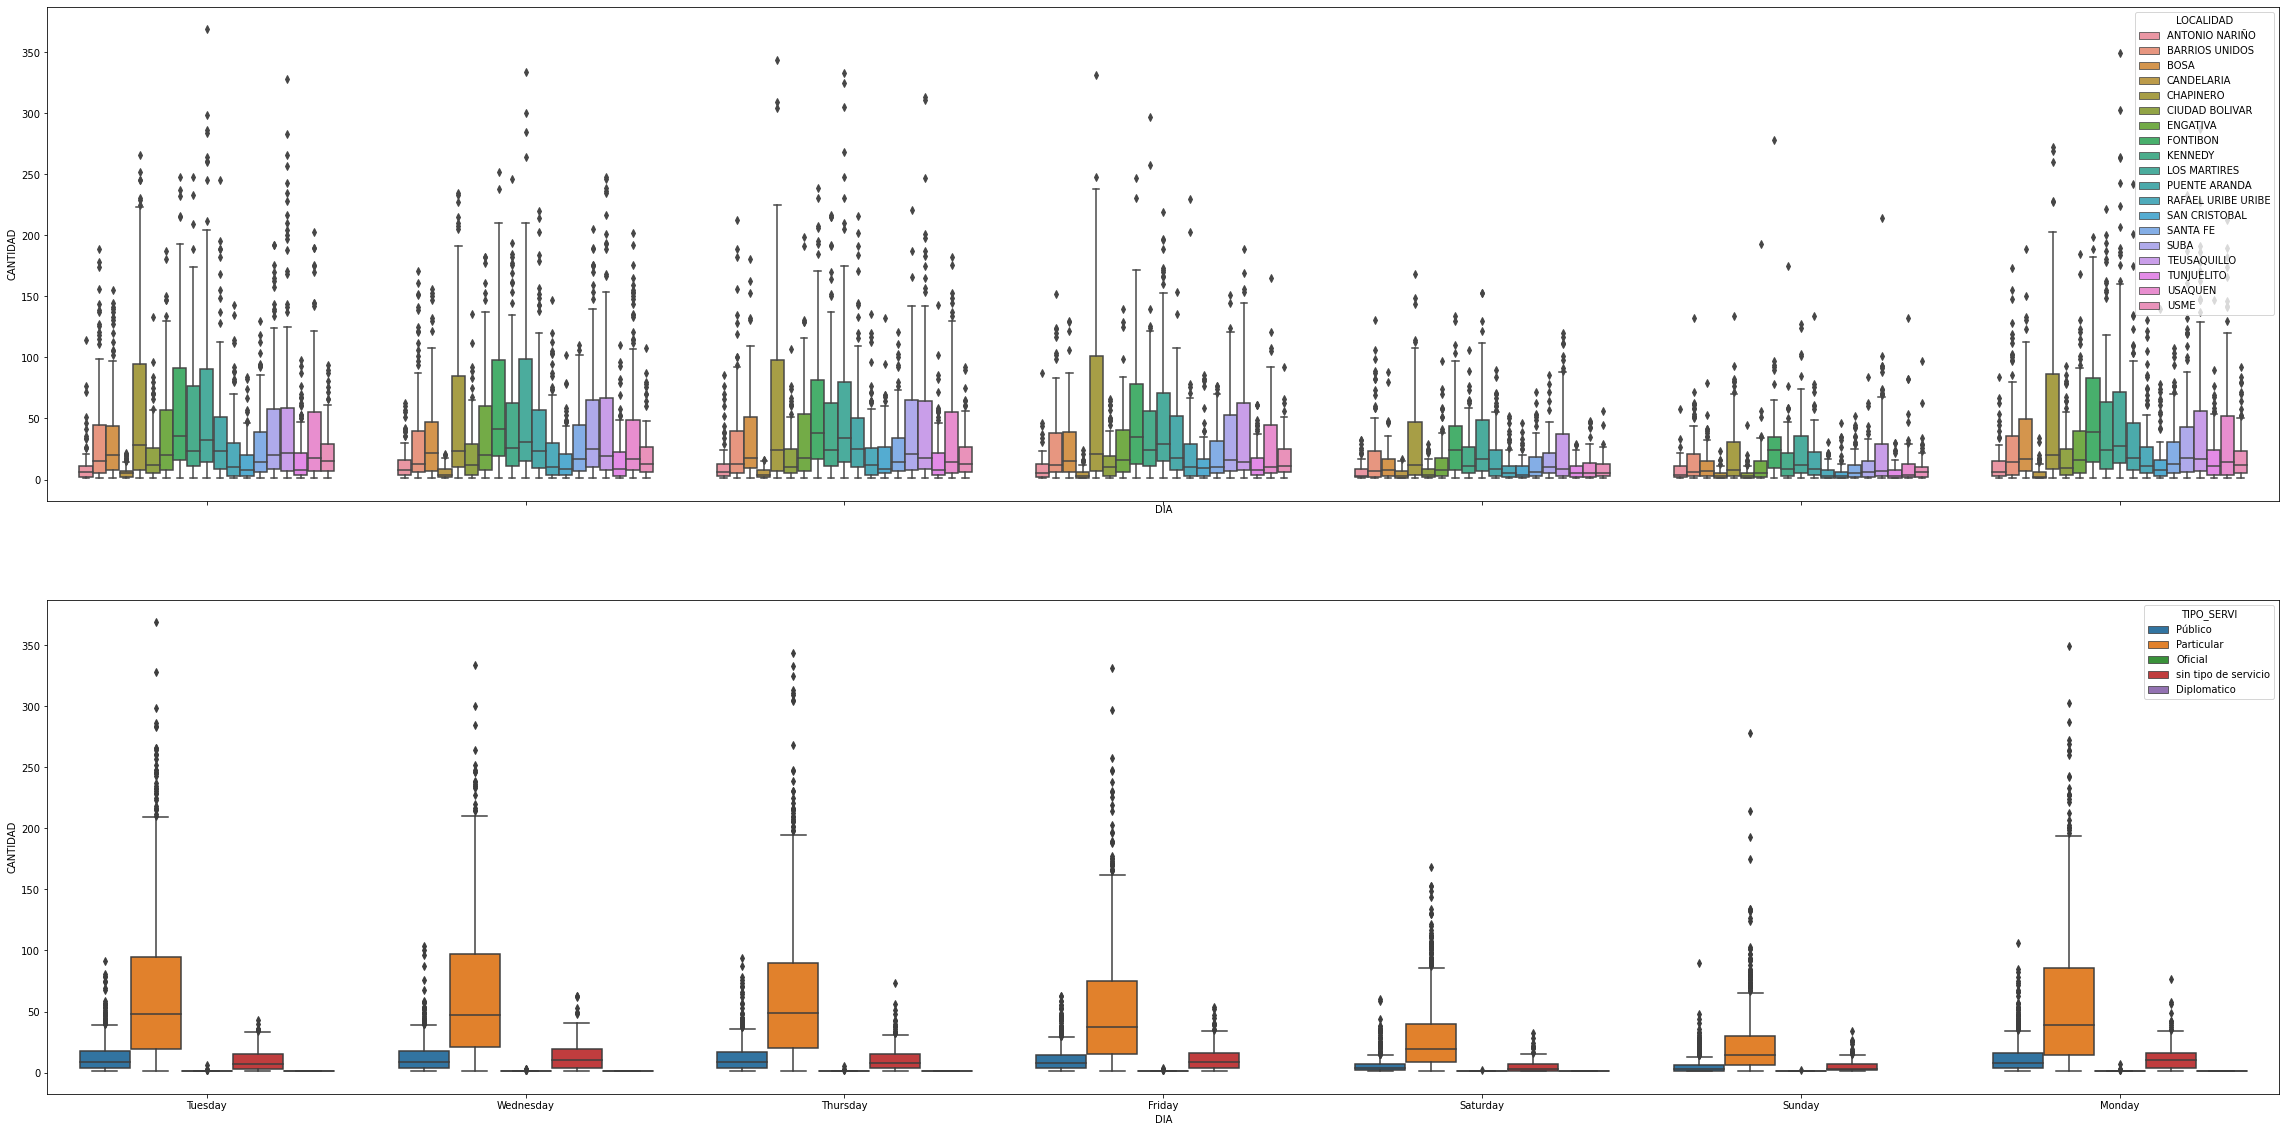

In [56]:
f, axes = plt.subplots(2, 1, figsize=(40,20), sharex=True)
row = 0
columns = ['LOCALIDAD', 'TIPO_SERVI']
for trait in columns:
    sns.boxplot(data=df,x='DIA',y='CANTIDAD',hue=trait,ax=axes[row])
    row += 1
plt.show()

### - Podemos inferir que los fines de semana es cuando menos se producen comparendos
### - La mayor parte de los comparendo son hacia vehiculos particulares 
### - Se observa como hay datos atipicos, podriamos utilizar el rango intercualtilpara eliminarlos y asi crear un modelo que prediga el numero de comparendo por localida y dia 

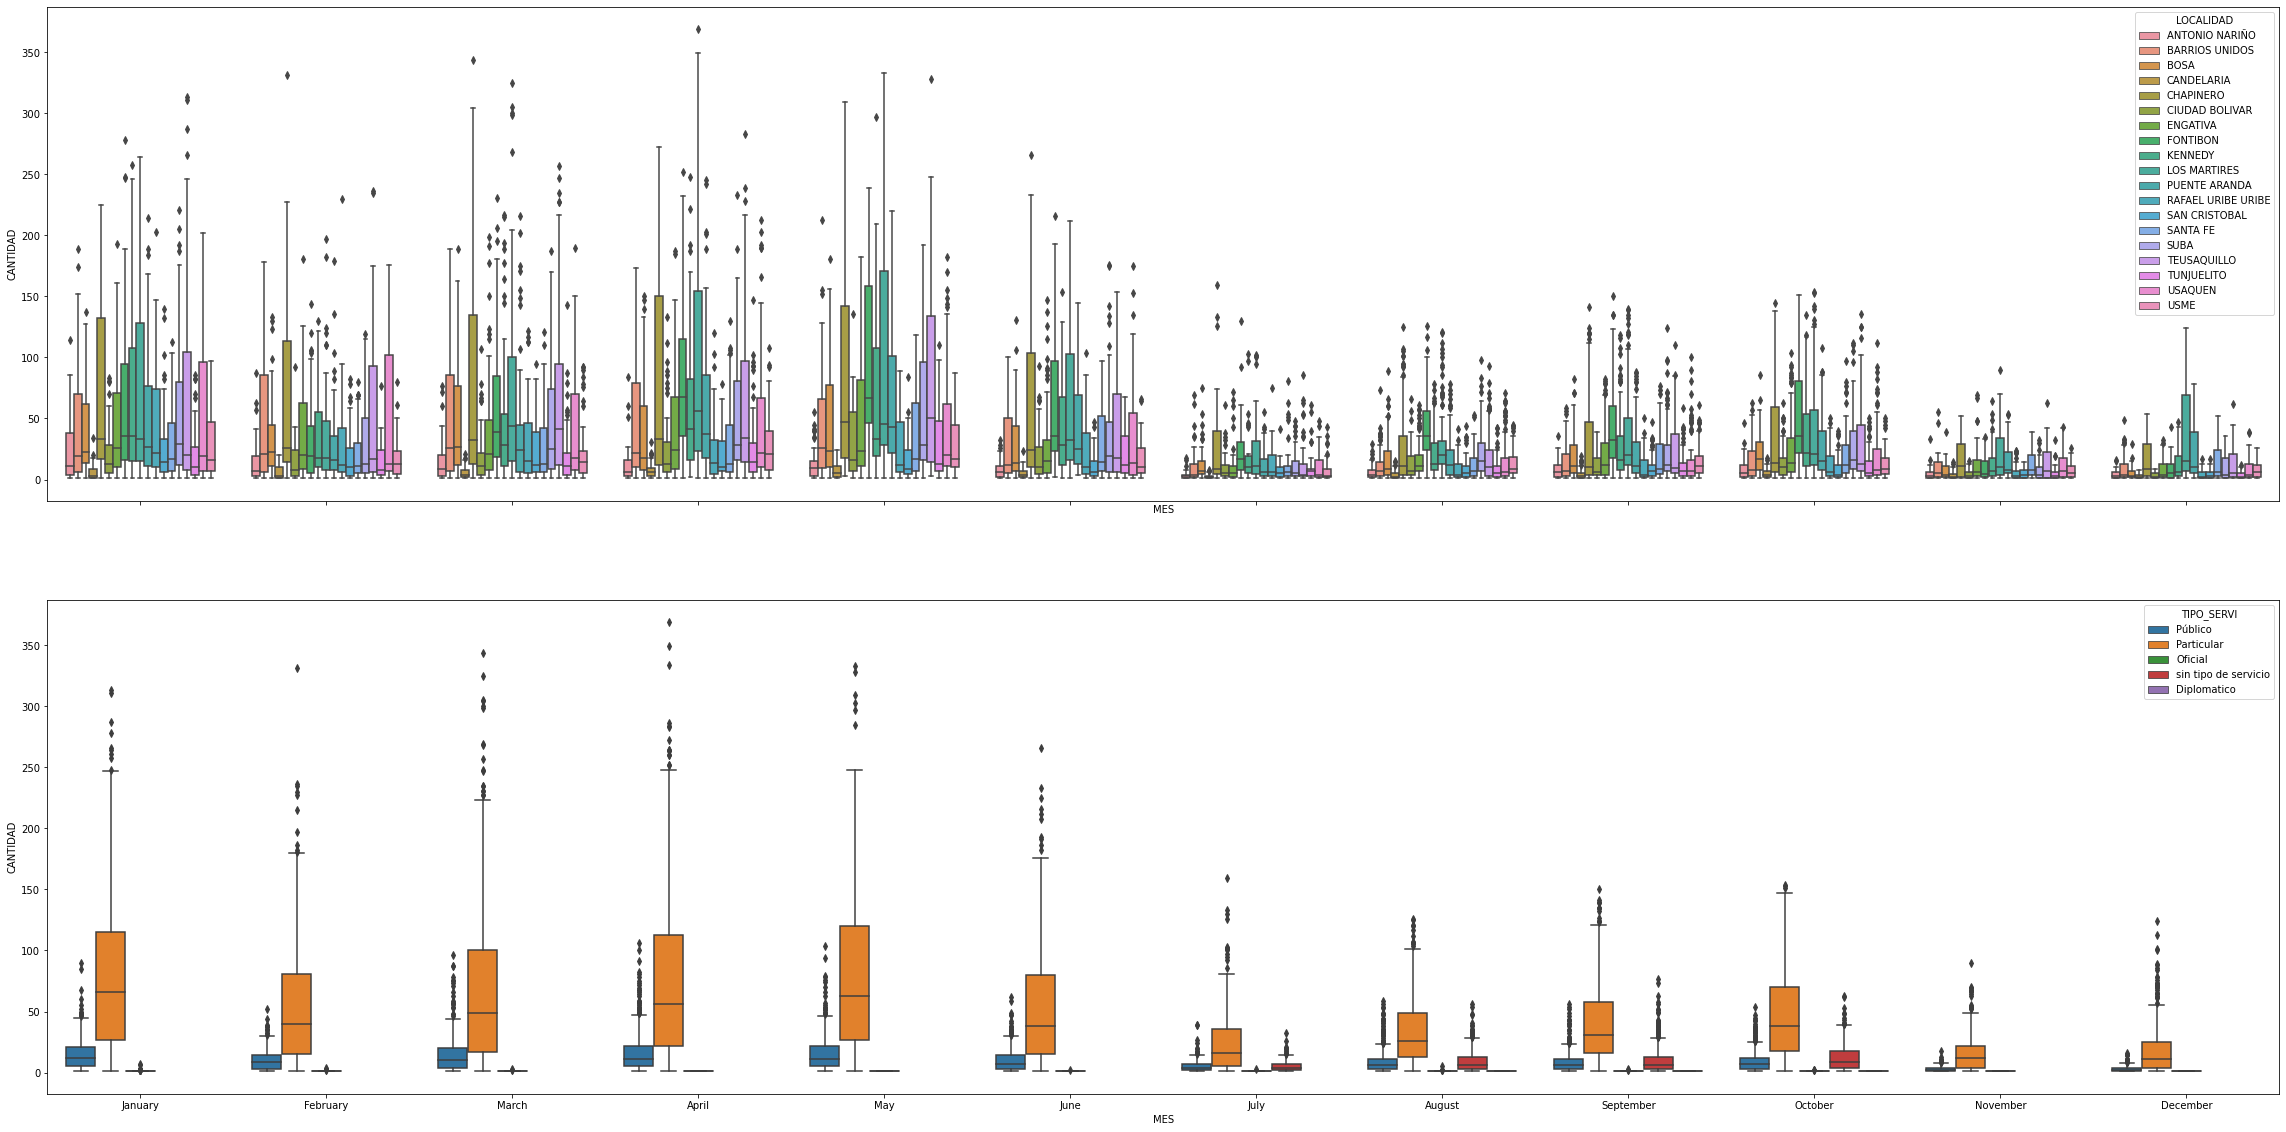

In [57]:
f, axes = plt.subplots(2, 1, figsize=(40,20), sharex=True)
row = 0
columns = ['LOCALIDAD', 'TIPO_SERVI']
for trait in columns:
    sns.boxplot(data=df,x='MES',y='CANTIDAD',hue=trait,ax=axes[row])
    row += 1
plt.show()

### - definitivamente debio existir alguna campana o algun suceso que redujera la cantida de comparendo en el segundo semestre
### - se observa tambien que existen ciertas localidades con alta cantidad de comparendos

## Cual es el porcentaje de comparendos por mes, dia y localidad comparado con el total?

In [89]:
df['PORC_CANT'] = df['CANTIDAD'] / df['CANTIDAD'].sum() * 100



In [95]:
LOC_MES = df.groupby(['LOCALIDAD','MES'])[['PORC_CANT']].sum()

LOC_DIA = df.groupby(['LOCALIDAD', 'DIA'])[['PORC_CANT']].sum()
LOC_DIA


PORC_CANT
LOCALIDAD      DIA                 
ANTONIO NARIÑO Friday      0.239035
               Monday      0.294943
               Saturday    0.132190
               Sunday      0.132438
               Thursday    0.301155
...                             ...
USME           Saturday    0.216921
               Sunday      0.220400
               Thursday    0.524536
               Tuesday     0.623181
               Wednesday   0.579698

[133 rows x 1 columns]

# Ahora veremos como se comportan los datos atraves del tiempo

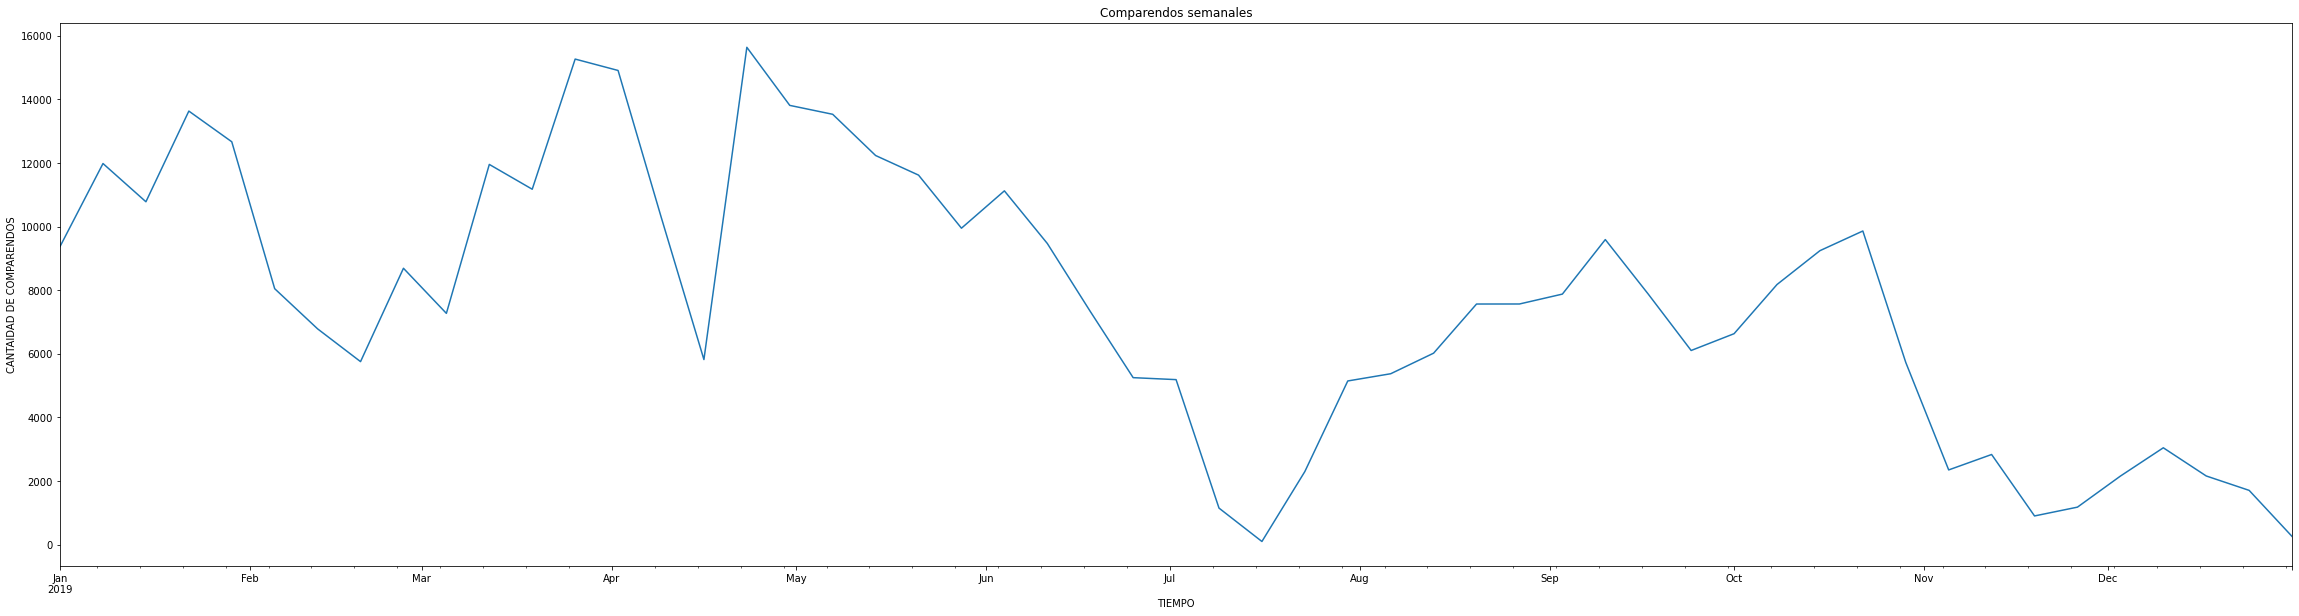

In [61]:
plt.figure(figsize=(40,10))
new_dataset_copy = df.set_index('FECHA_HORA')
new_dataset_copy['CANTIDAD'].resample('7D').sum().plot()#creamos una grafica de la cantidad de comparendos semanales
plt.title('Comparendos semanales')
plt.xlabel('TIEMPO')
plt.ylabel('CANTAIDAD DE COMPARENDOS')
plt.show()

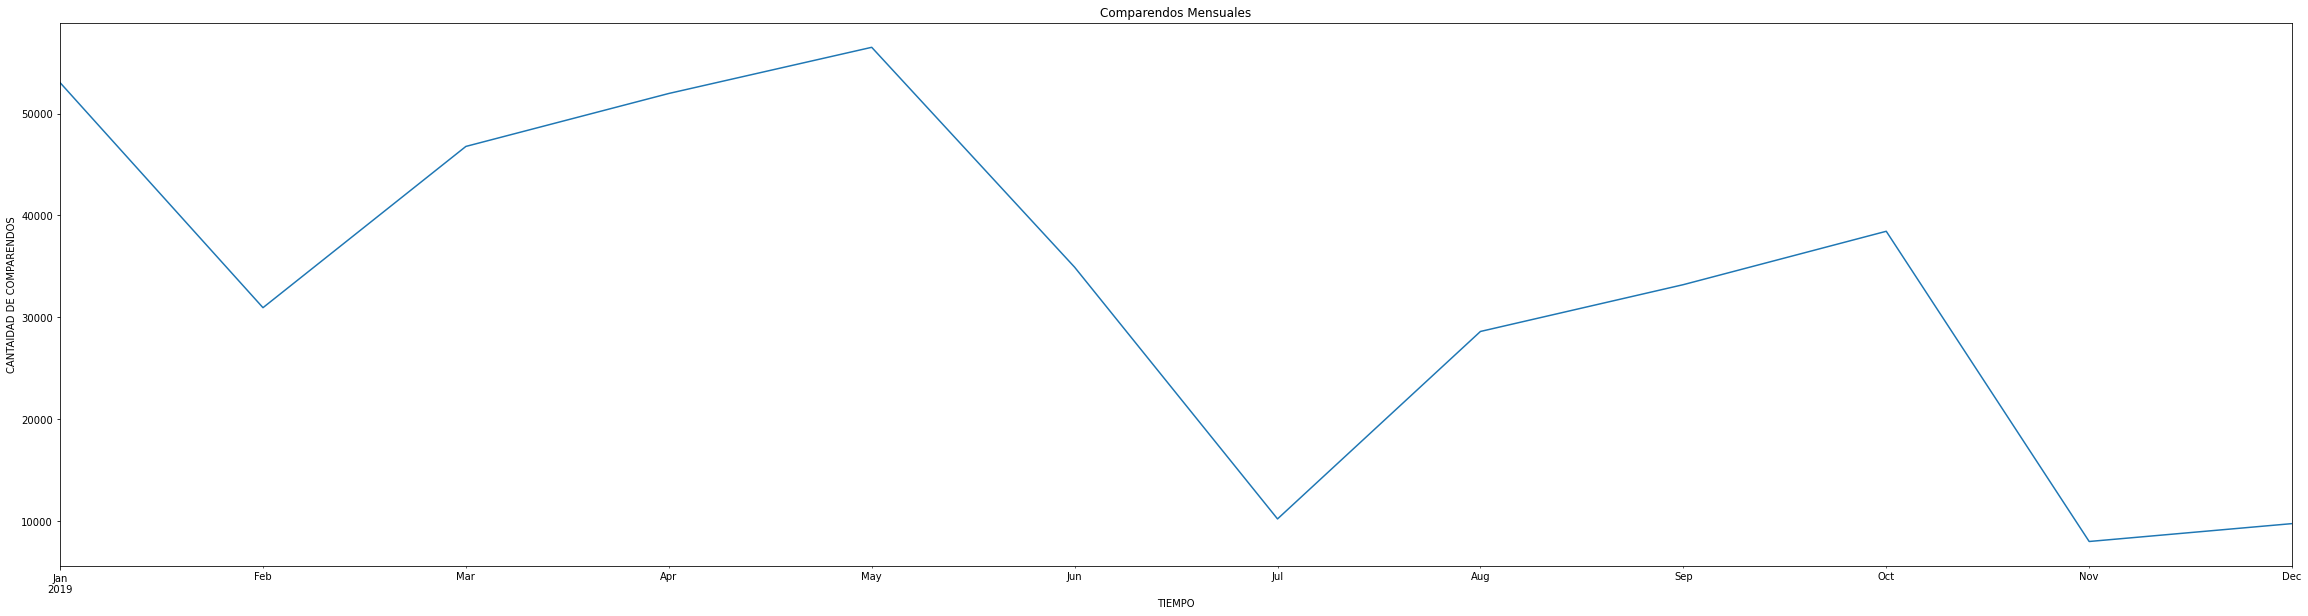

In [65]:
plt.figure(figsize=(40,10))
new_dataset_copy['CANTIDAD'].resample('M').sum().plot()#creamos una grafica de la cantidad de comparendos semanales
plt.title('Comparendos Mensuales')
plt.xlabel('TIEMPO')
plt.ylabel('CANTAIDAD DE COMPARENDOS')
plt.show()

<AxesSubplot:xlabel='MES', ylabel='CANTIDAD'>

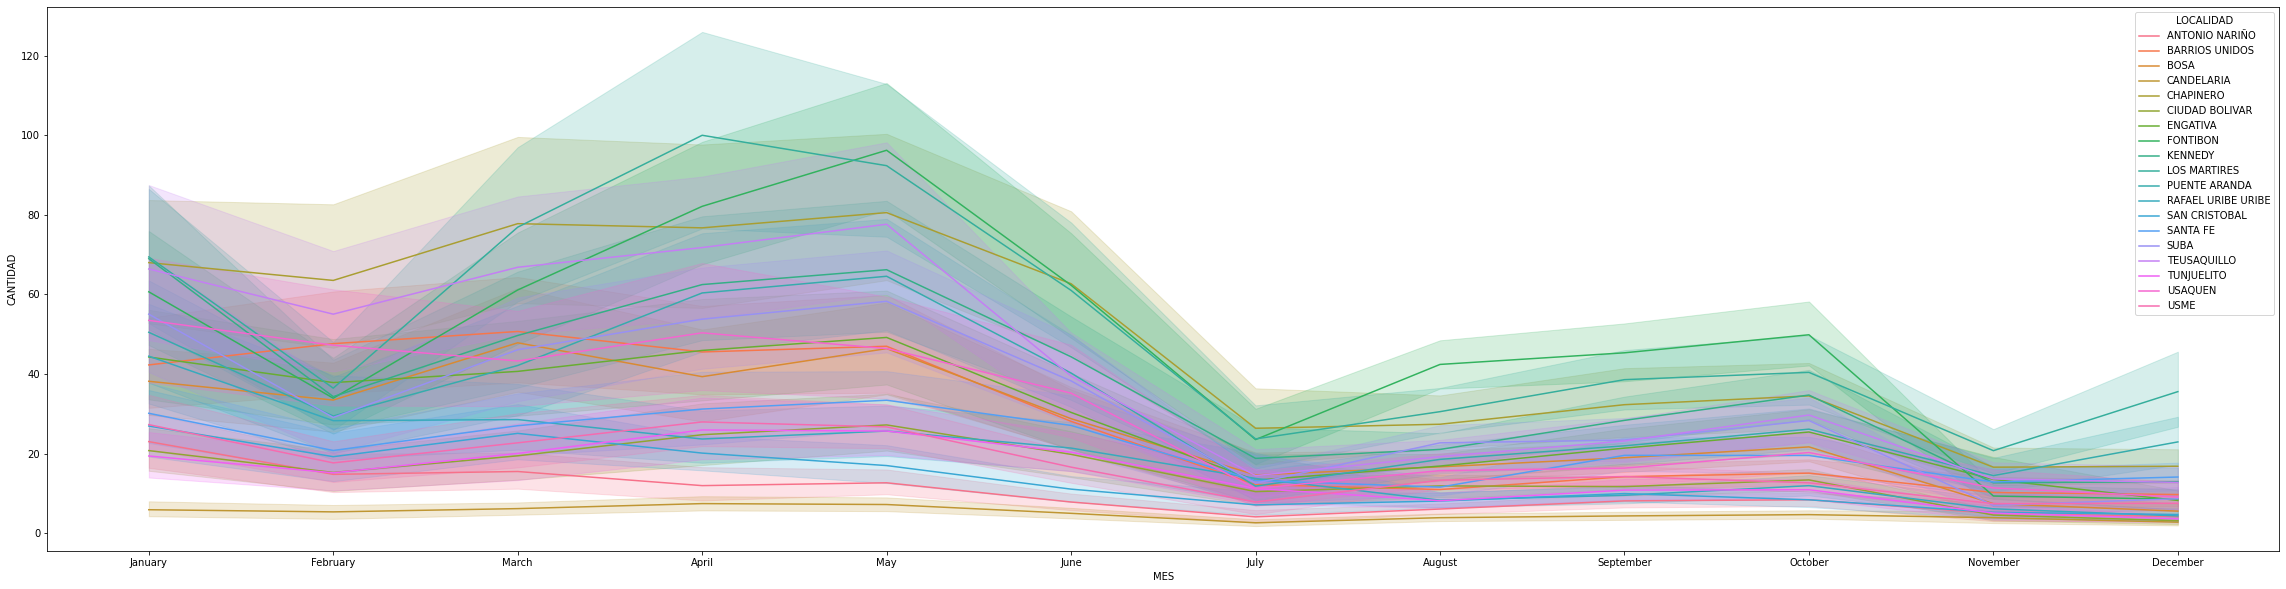

In [68]:
# se crea una selecion por channel_deliver y tiempo para tratar de ver alguna tendencia con la cantidad de productos
plt.figure(figsize=(40,10))
sns.lineplot(x="MES", y="CANTIDAD",
            hue="LOCALIDAD",
            data=df)


<Figure size 2880x1440 with 0 Axes>

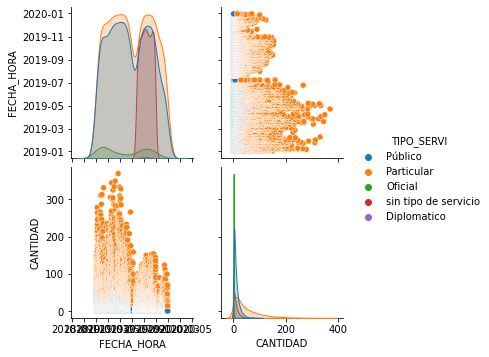

In [78]:
plt.figure(figsize=(40,20))
sns.pairplot(df, vars=['FECHA_HORA','CANTIDAD'], hue='TIPO_SERVI')


# - Podriamos quedarnos en el dataset y realizar muchas preguntas de diferentes tipos y responder todo
# - Si deseamos trabajar a nivel de barrios o calles lo podriamos hacer con un join espacial para etiquetar los puntos pertenecientes a cada barrio o calle
# - Como la idea es mostrar las habilidades en el manejo de informacion espacial procedemos a hacer un nuveo Notebook con estas caracteristicas